# Relatório - Análise Open Data
## Ressonâncias de massas com estado final de um par múon antimúon

Foi pedido para nós, uma análise simples de um $\textit{dataset}$ oriundo do $\textbf{CMS}$ $\textit{Open Data}$ para a escolha de um dos picos que caracterizam uma dada partícula adivinda de um processo que tem estado final um par de múons.
O objetivo principal é fazer ajustes ($\textit{fit}$) que modelam a ressonância escolhida pelo usuário. Esses $\textit{fit's}$ retornam como outputs a média e o erro da distribuição que modelam o pico de massa. Cada $\textit{fit}$ retorna uma média diferente e um erro também.

Abaixo, eu detalho passo a passo a construção do algoritmo para complentar a tarefa proposta

Abaixo, importamos as bibliotecas que seram usadas na presente análise

In [1]:
import uproot # abrir os arquivos .root
import numpy as np # colocar os dados no formato conhecido como numpy
import matplotlib.pyplot as plt # fazer os graficos
import mplhep as hep # responsável por algumas partes que envolve altas energias e estilização padrão do CMS e LHC
import seaborn as sns # para realizar estátisticas
import math # funções matemáticas

In [2]:
plt.style.use(hep.style.ROOT) # deixar os gráficos em formato rootianos por padrão do CMS

Aplicando o $\texttt{uproot}$, abrimos os arquivos em formato .root

In [3]:
myfile = uproot.open( 'Skim4.root' ) 

Explorando a $\texttt{tree}$ 

In [4]:
tree = myfile['oniaTree']

Ao abrir a $\texttt{tree}$, vizualizamos 4 $\texttt{branches}$. selecionamos o $\texttt{dimuon_p4}$ onde contém os dados em formato $\texttt{TLorentzVector}$ 

In [5]:
tree.keys()

[b'event', b'dimuon_p4', b'muonP_p4', b'muonN_p4']

Declarando uma variável chamada de $\texttt{data}$ que atribui o array $\texttt{TLorentzVector}$

In [6]:
data = tree['dimuon_p4'].array() 

In [7]:
data # Vizualização dos dados em formato TLorentzVector, cada um deles apresenta um evento

<ObjectArrayMethods [TLorentzVector(x=22.614, y=10.68, z=-30.315, t=43.803) TLorentzVector(x=-24.663, y=28.048, z=68.279, t=77.828) TLorentzVector(x=0.90503, y=-3.3181, z=68.011, t=107.17) ... TLorentzVector(x=5.8832, y=8.3591, z=-46.023, t=54.143) TLorentzVector(x=39.846, y=-23.877, z=100.73, t=143.03) TLorentzVector(x=-7.7948, y=-2.1713, z=-14.236, t=17.495)] at 0x7fd55537ca90>

Atribuimos listas vazias para cada uma das informações que queremos extrair do arquivo. Aqui, apresentado por: 
* $\texttt{massa}$ --> Massa Invariante 
* $\texttt{pt}$ --> Momentum Transverso 
* $\texttt{eta}$ --> Pseudorapidez 

In [8]:
lista_massa = []
lista_pt    = []
lista_eta   = []
for i in range( 0 , data.size ):
    lista_massa.append( data[i].mass ) # preenchendo a lista vazia das massas com o atributo massa do TLorentzVector  
    lista_pt.append( data[i].pt ) # preenchendo a lista vazia do momentum transverso com o atributo pt do TLorentzVector  
    lista_eta.append( data[i].eta ) # preenchendo a lista vazia das pseudorapidez com o atributo eta do TLorentzVector  

Colocamos os resultados obtidos em formato numpy array

In [9]:
lista_massa = np.array( lista_massa )
lista_pt = np.array( lista_pt )
lista_eta = np.array( lista_eta )

# Distribuição da massa invariante do par de múons

Plotamos a distribuição da massa invariante do par de muons em um histograma e localizamos as ressonâncias das massas conhecidas pela comunidade de Física de Altas Energias.
No gráfico, está o nome característico de cada ressonância. 

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


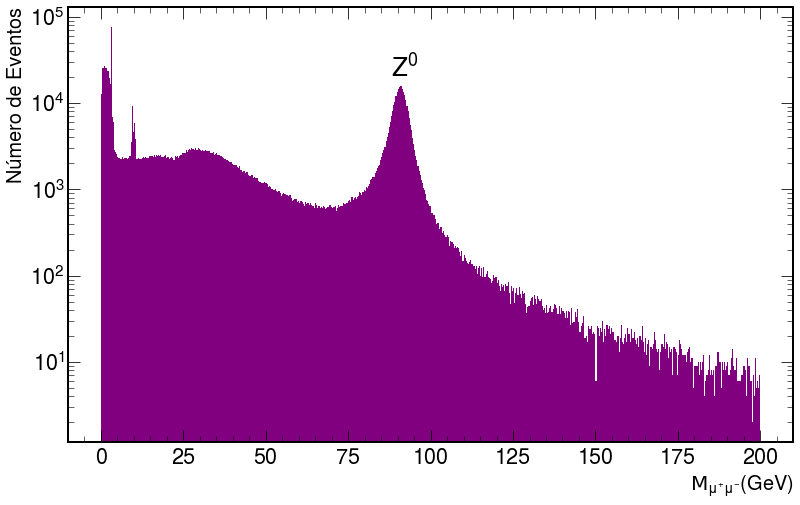

In [10]:
plt.figure(figsize=(13,8))
plt.hist( lista_massa , bins = 600 , color = 'purple', range = (0,200))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,3), useMathText = True)
plt.xlabel(r'$\mathcal{M}_{\mu^{+}\mu^{-}}$(GeV)', fontsize = 20)
plt.ylabel('Número de Eventos',fontsize = 20)
plt.yscale( 'log' )
plt.text(88,20000,r'$Z^{0}$' )
plt.style.use(hep.style.ROOT)

## Fazemos um zoom entre o intervalo de 0 à 11

(-0.2, 11.0)

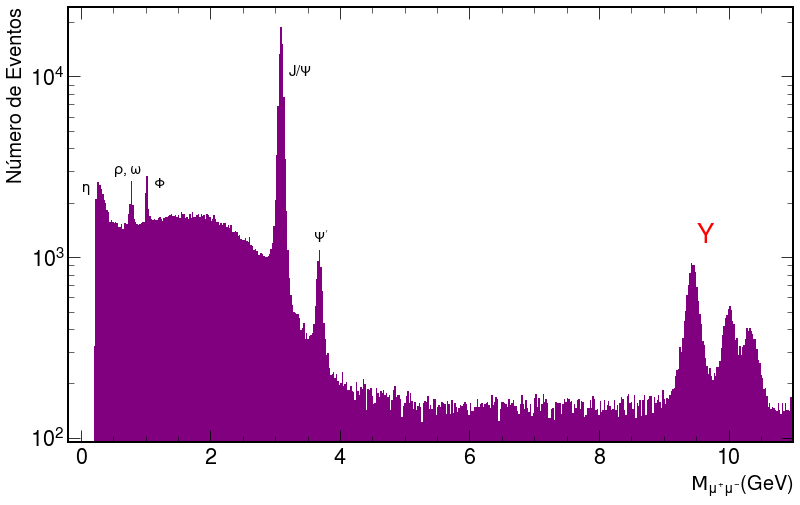

In [11]:
plt.figure(figsize=(13,8))
plt.hist( lista_massa , bins = 500 , color = 'purple', range = (0,11))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,3), useMathText = True)
plt.xlabel(r'$\mathcal{M}_{\mu^{+}\mu^{-}}$(GeV)', fontsize = 20)
plt.ylabel('Número de Eventos',fontsize = 20)
plt.yscale( 'log' )
plt.text(1.11,2400,r'$\Phi $', fontsize=15)
plt.text(3.2,10000,r'$J/\Psi $', fontsize=15)
plt.text(3.58,1200,'$\Psi \' $', fontsize=15)
plt.text(9.5,1200,r'$\Upsilon $', color = 'red' )
plt.text(0,2300,r'$\eta $', fontsize=15)
plt.text(0.49,2900,r'$\rho,\omega $', fontsize=15)
plt.xlim(-0.2,11)

Na região em torno de 10 GeV, está na cor em vermelho pois é a partícula escolhida por mim para fazer o fit desejado

# Ressonância de massa --> $\Upsilon$(nS).

Foi escolhido a partícula Upsilon que tem como composição um quark bottom e antibottom. 
A natureza dessa partícula nos indica 3 picos que simboliza a composição da mesma:
* $\Upsilon(1S)$ --> 1 bottom e 1 antibottom
* $\Upsilon(2S)$ --> 2 bottom e 2 antibottom
* $\Upsilon(3S)$ --> 3 bottom e 3 antibottom

Perante toda a distribuição da massa invariante do múon, restringimos o intervalo para fazer a análise

In [12]:
lista_massa_cut = (lista_massa < 12) & (lista_massa > 7) # limites para o pico do méson Upsilon 
lista_massa_Upsi = lista_massa[lista_massa_cut]
print('lista das massas após o corte --> ' , lista_massa_Upsi , '\n' , 'Quantidade de eventos -->' , lista_massa.size )

lista das massas após o corte -->  [ 9.43301678 10.05546284  9.89787865 ...  9.11357784  9.86500931
 10.49369431] 
 Quantidade de eventos --> 998881


Text(10.2, 160, '$\\Upsilon$(3S)')

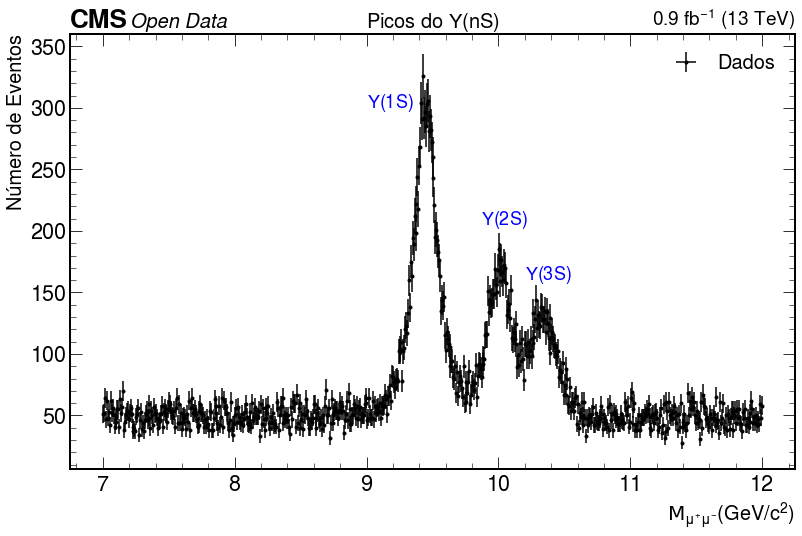

In [13]:
plt.figure( figsize = ( 13, 8 ) )

counts_1, bin_edges_1 = np.histogram( lista_massa_Upsi , bins = np.linspace( 7, 12, 700 ) )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, 
              yerr = errors_1, 
              xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2 , 
              fmt = '.', 
              label = 'Dados', color = 'black' )

plt.xlabel( r'$\mathcal{M}_{\mu^{+}\mu^{-}}$(GeV/c$^{2}$)', fontsize = 20)
plt.ylabel( 'Número de Eventos',fontsize = 20)
hep.cms.label( llabel = "Open Data", rlabel = "0.9 fb$^{-1}$ (13 TeV)", fontsize = 20)
plt.title( r"Picos do $\Upsilon$(nS)" , fontsize = 20 )
plt.legend( loc = 'best', fontsize = 20 )
plt.text(9.,300, r'$\Upsilon$(1S)', fontsize = 18 , color = 'blue')
plt.text(9.87,205, r'$\Upsilon$(2S)', fontsize = 18 , color = 'blue')
plt.text(10.2,160, r'$\Upsilon$(3S)', fontsize = 18 , color = 'blue')

# Corte de 5 GeV no $P_{T}$ e no $\eta$

Levando em consideração que a massa do $\Upsilon(1S)$ é em torno de 9 GeV e tudo indica que já existe um corte alto no dataset proposto o que levaria a selecionar esse mésons muito $\textit{boostado}$ já que numa situação do LHC é pouco provável que iriamos produzi-lo em repouso caso o contrário o corte ficaria muito radical para altos $P_{T}$.

Na situação atual, um corte de 5 GeV foi aplicado para provar essa argumentação. Outro corte maior em torno de 30 GeV também citado como contra prova.

In [14]:
corte_pt = 5

lista_pt_cut = (lista_pt > corte_pt) # corte do pt maior que 5 GeV

lista_massa_pt = lista_massa[lista_pt_cut]
lista_pt_after_cut = lista_pt[lista_pt_cut]
lista_eta_pt = lista_eta[lista_pt_cut]

####################################################################################

corte_pt2 = 30
lista_pt_cut2 = (lista_pt > corte_pt2) # corte do pt maior que 30 GeV

lista_massa_pt2 = lista_massa[lista_pt_cut2]

print('lista da massa invariante antes do corte do Pt --> ' , lista_massa , '\n' , 'Quantidade de eventos -->' , lista_massa.size )
print('\n')
print('lista da massa invariante após corte do Pt de 5 GeV --> ' , lista_massa_pt , '\n' , 'Quantidade de eventos -->' , lista_massa_pt.size )
print('\n')
print('lista da massa invariante após corte do Pt de 30 GeV --> ' , lista_massa_pt2 , '\n' , 'Quantidade de eventos -->' , lista_massa_pt2.size )
print('\n')
print('lista do valor da pseudorapidez após o corte do Pt 30 GeV --> ', lista_eta_pt )
print('\n')
print('lista do valor do momentum transverso após o corte do Pt 30 GeV --> ', lista_pt_after_cut )

lista da massa invariante antes do corte do Pt -->  [19.34394073  0.52595824 82.75938416 ... 26.62436295 90.30063629
  6.16059542] 
 Quantidade de eventos --> 998881


lista da massa invariante após corte do Pt de 5 GeV -->  [19.34394073  0.52595824 28.55327797 ... 26.62436295 90.30063629
  6.16059542] 
 Quantidade de eventos --> 912491


lista da massa invariante após corte do Pt de 30 GeV -->  [ 0.52595824 10.05546284 25.84843636 ...  3.09356785 92.85929108
 90.30063629] 
 Quantidade de eventos --> 325323


lista do valor da pseudorapidez após o corte do Pt 30 GeV -->  [-1.02372301  1.36401212  1.79460359 ... -2.20986056  1.51650691
 -1.33051014]


lista do valor do momentum transverso após o corte do Pt 30 GeV -->  [25.00948715 37.34931946 12.30689526 ... 10.22187996 46.45231247
  8.09152222]


# Distribuição do $P_{T}$ do par do múon

Este plot nos mostra a distribuição do momentum transverso e a localização de cada corte

(exptext: Custom Text(0.07103631889652479, 1, 'CMS'),
 expsuffix: Custom Text(0.07103631889652479, 1.005, 'Open Data'))

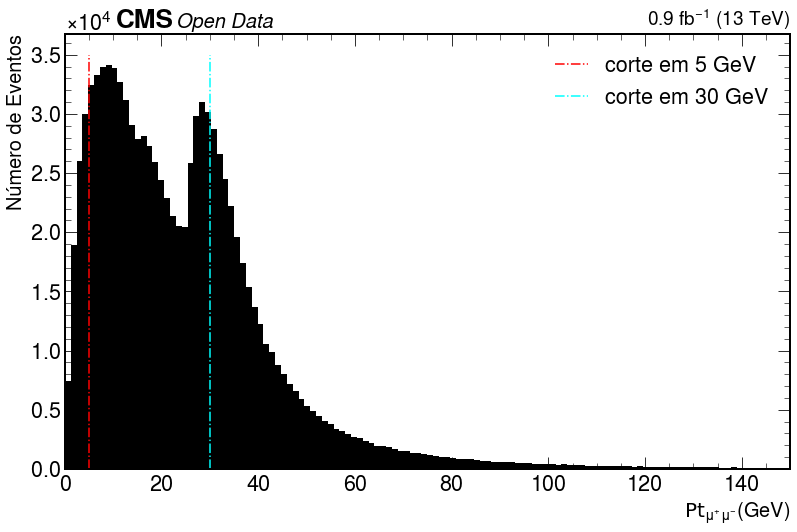

In [15]:
plt.figure( figsize = ( 13, 8 ) )
plt.hist( lista_pt , bins = 1000 , color = 'black')
plt.plot([5,5],[0,3.5e4], '-.',color = 'red', label = r'corte em {} GeV'.format(corte_pt))
plt.plot([30,30],[0,3.5e4], '-.',color = 'cyan', label = r'corte em {} GeV'.format(corte_pt2))
plt.ticklabel_format( axis = "y", style = "sci", scilimits = ( 0,3 ), useMathText = True)
plt.xlabel( r'$\mathcal{Pt}_{\mu^{+}\mu^{-}}$(GeV)', fontsize = 20 )
plt.ylabel( 'Número de Eventos', fontsize = 20 )
plt.xlim( 0,150 )
plt.legend(loc='best')
hep.cms.label( llabel = "Open Data", rlabel = "0.9 fb$^{-1}$ (13 TeV)", fontsize = 20 )

# Comportamento do sinal antes e depois do corte

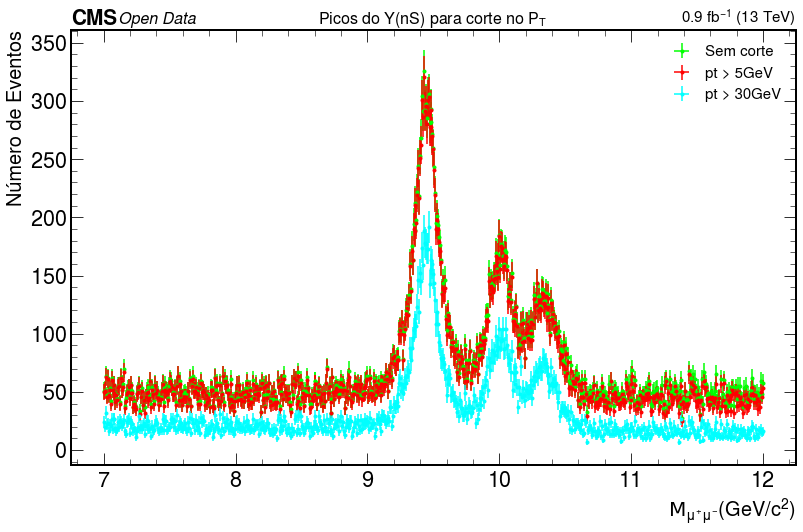

In [16]:
plt.figure(figsize=(13,8))

counts_1, bin_edges_1 = np.histogram( lista_massa , bins=np.linspace(7,12,700))
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar(bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2,fmt='.', label = 'Sem corte', color = 'lime')

counts_2, bin_edges_2 = np.histogram( lista_massa_pt , bins=np.linspace(7,12,700))
errors_2 = np.sqrt( counts_2 )
bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
plt.errorbar(bin_centres_2, counts_2, yerr=errors_2, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2,fmt='.', label = 'pt > {}GeV'.format(corte_pt), color = 'red')

counts_2, bin_edges_2 = np.histogram( lista_massa_pt2 , bins=np.linspace(7,12,700))
errors_2 = np.sqrt( counts_2 )
bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
plt.errorbar(bin_centres_2, counts_2, yerr=errors_2, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2,fmt='.', label = 'pt > {}GeV'.format(corte_pt2), color = 'cyan')

plt.xlabel(r"$\mathcal{M}_{\mu^{+}\mu^{-}}(GeV/c^{2})$", fontsize = 20)
plt.ylabel('Número de Eventos',fontsize = 20)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,3), useMathText = True)
hep.cms.label(llabel="Open Data", rlabel="0.9 fb$^{-1}$ (13 TeV)", fontsize = 16)
plt.title(r"Picos do $\Upsilon$(nS) para corte no $P_{T}$ " , fontsize = 16)
plt.legend(loc='best',fontsize = 15)
#plt.xlim(8.5,9.9)
plt.style.use(hep.style.ROOT)

O que podemos extrair de informação desse pequeno estudo é a argumentação feita anteriormente, de que, cortes muito altos para o $P_{T}$ dimunui o comprimento do pico e sua largura e consequentemente a calda do mesmo também sofre modificações, o que fica incerto de fazer o ajuste por causa do pico do sinal procurado que se encontra com um valor mais baixo. Quando e feito cortes para baixo momentum transverso, notamos não haver modificações robustas para o mesmo, isto é, seleções anteriores para o Open Data ja foram aplicados o que torna discriminação de baixos valores de $P_{T}$ irrelevantes 

# Escolha do Pico --> $\Upsilon(1S)$

Dos três picos que caracterizam o Méson, escolhi o associado a 1 quark charm/anticharm ( o maior pico dos 3 )

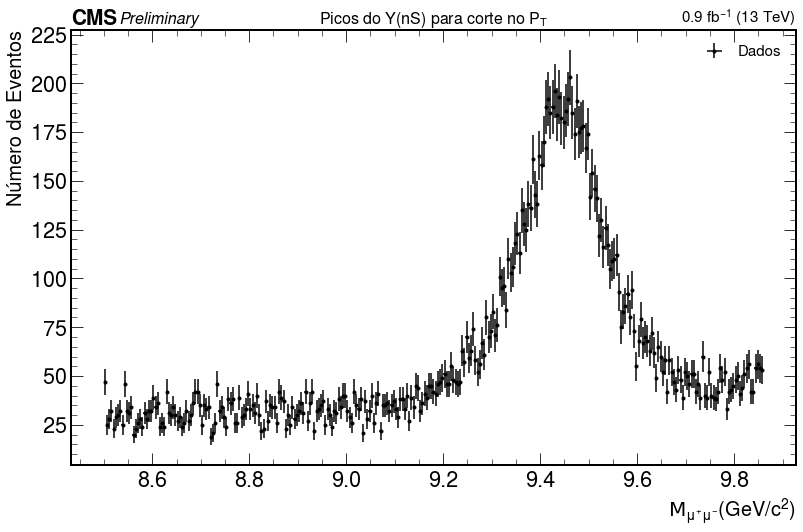

In [17]:
xmin , xmax = 8.5 , 9.86 # intervalo do pico escolhido

lista_massa_cut = ( lista_massa_pt < xmax ) & ( lista_massa_pt > xmin ) # intervalo de massa característico do pico do méson Upsilon(1S) 
lista_massa_fit = lista_massa_pt[ lista_massa_cut ]

plt.figure(figsize=(13,8))

counts_1, bin_edges_1 = np.histogram( lista_massa_fit , bins=np.linspace(xmin,xmax,300))
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar(bin_centres_1, counts_1, 
             yerr = errors_1, xerr = abs(bin_centres_1[4] - bin_centres_1[5])/2,
             fmt='.', label = 'Dados', color = 'black')

plt.xlabel(r"$\mathcal{M}_{\mu^{+}\mu^{-}}(GeV/c^{2})$", fontsize = 20)
plt.ylabel('Número de Eventos',fontsize = 20)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,3), useMathText = True)
hep.cms.label(llabel="Preliminary", rlabel="0.9 fb$^{-1}$ (13 TeV)", fontsize = 16)
plt.title(r"Picos do $\Upsilon$(nS) para corte no $P_{T}$ " , fontsize = 16)
plt.legend(loc='best',fontsize = 15)
#plt.xlim(9.1,9.75)
plt.style.use(hep.style.ROOT)

## A biblioteza $\texttt{zfit}$

O pacote zfit é uma biblioteca de ajuste de modelo baseada no TensorFlow e otimizada para manipulação simples e direta das funções de densidade de probabilidade. O foco principal é a escalabilidade, paralelização e uma estrutura de experiência amigável (sem cython, sem C ++ necessário para estender). A ideia básica é oferecer uma alternativa orientada para python para a biblioteca RooFit de muito sucesso do ROOTpacote de análise de dados. Embora o RooFit tenha fornecido uma plataforma estável para a maioria das necessidades da comunidade de Física de Altas Energias (HEP) nos últimos anos, tornou-se cada vez mais difícil integrar todos os desenvolvimentos do ecossistema científico Python no RooFit devido à sua natureza monolítica. Por outro lado, o núcleo do zfit visa se tornar um terreno sólido para ajuste de modelo, ao mesmo tempo que fornece flexibilidade suficiente para incorporar ferramentas de última geração e permitir escalabilidade para conjuntos de dados maiores. Essa tarefa desafiadora é enfrentada seguindo dois pilares básicos de design:

* O esqueleto e a extensão do código são minimalistas, simples e finitos: a biblioteca zfit é projetada exclusivamente para o propósito de ajuste e amostragem de modelo - oposto aos frameworks RooFit / ROOT independentes - sem nenhuma tentativa de estender suas funcionalidades para recursos como como métodos estatísticos ou plotagem. Essa filosofia de design é bem exemplificada pelo exame de ajustes de probabilidade máxima: enquanto o zfit funciona como um back-end para ajustes de probabilidade e pode ser integrado a pacotes como hepstats e matplotlib , o RooFit realiza o ajuste, o tratamento estatístico e a plotagem interna. Este escopo mais amplo do RooFit resulta em uma falta de flexibilidade com relação a novos minimizadores, métodos estatísticos e, de modo geral, qualquer nova ferramenta que possa surgir. 

* Outro aspecto fundamental do zfit é seu design para paralelização e escalabilidade ideais. Embora a escolha do TensorFlow como back-end apresente uma forte dependência de software, seu uso fornece vários recursos interessantes no contexto de ajuste de modelo. O conceito principal é que o TensorFlow é construído sob o modelo de programação de fluxo de dados . Simplificando, o TensorFlow cria um gráfico computacional com as operações como os nós do gráfico e tensores em suas bordas. Portanto, o cálculo só acontece quando o gráfico é executado em uma sessão, o que simplifica a paralelização ao identificar as dependências entre as bordas e as operações ou mesmo a partição em vários dispositivos (mais detalhes podem ser encontrados no guia do TensorFlow) A arquitetura do zfit é construída sobre essa ideia e visa fornecer uma interface de alto nível para esses recursos, ou seja , a maioria das operações de gráficos e avaliações ficam ocultas para o usuário, deixando uma experiência de ajuste e amostragem natural e amigável do modelo.

In [18]:
import zfit

## Primeiro Fit

* Fit para o Signal --> Gauss
Observado o último plot, percebe-se que a distribuição tem um formato do estilo gaussiano, logo:

$$
G = \dfrac{1}{\sqrt{2 \pi \sigma^{2}}} \exp \left [ - \dfrac{1}{2} \left ( \dfrac{x - \mu}{\sigma} \right )^{2} \right ]
$$
Onde $\mu$ representa a média do ajuste, $\sigma$ o erro associado e $x$ a distribuição da massa

* Fit para o Background --> Exponencial
$$
E = \dfrac{\exp^{\lambda x}}{\int \exp^{\lambda x}dx}
$$

Onde $\lambda$ é o parâmetro característico do fit e $x$ a distribuição da massa 


In [19]:
obs = zfit.Space("x", limits=(xmin, xmax)) # limites para fazer o fit 

Na seguinte célula, estabelecemos os parâmetros para a procura do melhor ajuste. 
A semelhança da declaração é a mesma que no $\texttt{RooFit}$, o segundo e terceiro número está associado ao intervalo que procuramos o melhor ajuste. O primeiro é um valor inicial aleatório que esteja dentro do intervalo mencionado

In [20]:
# parameters
mu = zfit.Parameter("massa", 9.5, 9.1 , 9.7)
sigma = zfit.Parameter("erro", 0.2, 0.01, 1)
lambd = zfit.Parameter("lambda", 0.4, -1, 1)
frac = zfit.Parameter("fraction", 0.5, 0, 1)

Fazemos a pdf para cada distribuição

In [21]:
gauss = zfit.pdf.Gauss(mu=mu, sigma=sigma, obs=obs, name = 'Gauss')
exponential = zfit.pdf.Exponential(lambd, obs=obs, name = 'Exponencial')
model = zfit.pdf.SumPDF([gauss, exponential], fracs = frac, name = 'Gauss + Exponencial') # Soma das duas pdf

In [22]:
color = 'black' # cor para fazer os plots
n_bins = 50 

linewidth = 2.5 
plot_scaling = lista_massa_fit.size / n_bins * obs.area() # fator de correção das pdf's

x = np.linspace(xmin, xmax, lista_massa_fit.size)
data = zfit.Data.from_numpy( obs = obs, array = lista_massa_fit ) # colocar os dados em formato zfit

<ipython-input-22-ad9cbc5b8a6f>:5: UserWarning: The function <function Space.area at 0x7fd51b824160> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[8.5]]), array([[9.86]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  plot_scaling = lista_massa_fit.size / n_bins * obs.area() # fator de correção das pdf's


### Minuit 
O programa procura por um mínimo em uma função definida pelo usuário com relação a um ou mais parâmetros usando vários métodos diferentes conforme especificado pelo usuário. Além disso, ele pode calcular intervalos de confiança para os parâmetros examinando a função em torno do mínimo.

In [23]:
minimizer = zfit.minimize.Minuit() 

### Criando um minimizador

Uma função de perda pode ser definida como uma medida da discrepância entre os dados observados e os dados previstos pela função ajustada. Até certo ponto, pode ser visualizado como uma métrica de $\textit{goodness}$ de uma determinada previsão conforme você altera as configurações do seu algoritmo. Por exemplo, em um modelo linear geral, a função de perda é essencialmente a soma dos desvios quadrados da linha ou plano ajustado. Uma aplicação mais útil no contexto da Física de Altas Energias (FAE) é o Estimador de Máxima Verossimilhança (MLE). O MLE é um tipo específico de estimativa de modelo de probabilidade, onde a função de perda é o log-verossimilhança negativo (NLL).

No zfit, as funções de perda herdam da classe BaseLoss e seguem uma interface comum, na qual o modelo, o conjunto de dados deve ser fornecido, e onde as restrições de parâmetro na forma de um dicionário {param: constraint} podem ser fornecidas. Como exemplo, podemos criar uma perda de probabilidade logarítmica negativa não embutida (UnbinnedNLL) a partir do modelo descrito na seção Modelo básico e os dados da seção Dados:

In [24]:
# create NLL
nll_gauss = zfit.loss.UnbinnedNLL( model = gauss, data = data )
nll_expon = zfit.loss.UnbinnedNLL( model = exponential, data = data )
nll_somat = zfit.loss.UnbinnedNLL( model = model, data = data )

O resultado do ajuste é o retorno como um objeto FitResult, que fornece acesso ao estado do minimizador. zfit separa a minimização da função de perda com relação ao cálculo do erro para dar a liberdade de calcular este erro sempre que necessário. O método error () pode ser usado para realizar o cálculo de erro intensivo da CPU. Ele retorna dois objetos, o primeiro são os erros de parâmetro e o segundo é um novo FitResult caso um novo mínimo seja encontrado durante a criação de perfil; isso também tornará o resultado original inválido, como pode ser verificado com result.valid.

## Fit Gaussiano

In [25]:
result_gauss = minimizer.minimize( nll_gauss )
param_errors_gauss, _ = result_gauss.errors()

------------------------------------------------------------------
| FCN = 3789                    |      Ncalls=72 (72 total)      |
| EDM = 0.000184 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


/home/matheus/miniconda3/lib/python3.8/site-packages/zfit/minimizers/fitresult.py:358: FutureWarning: 'minuit_minos' will be changed as the default errors method to a custom implementationwith the same functionality. If you want to make sure that 'minuit_minos' will be used in the future, add it explicitly as in `errors(method='minuit_minos')`
  warnings.warn("'minuit_minos' will be changed as the default errors method to a custom implementation"


Quando o nome $\texttt{True}$ estiver em verde, significa que o fit convergiu e os parâmetros encontrados da massa e do erro estão abaixo

In [26]:
result_gauss

FitResult of
<UnbinnedNLL model=[<zfit.Gauss  params=[erro, massa] dtype=float64>0] data=[<zfit.core.data.Data object at 0x7fd5181e8370>] constraints=[]> 
with
<Minuit strategy=PushbackStrategy tolerance=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm     │ min value   │
╞═════════╪═════════════╪══════════════════╪═════════╪═════════════╡
│ True    │ True        │ False            │ 0.00018 │ 3789        │
╘═════════╧═════════════╧══════════════════╧═════════╧═════════════╛

Parameters
name      value         minuit_minos    at limit
------  -------  -------------------  ----------
massa     9.445  -  0.007   + 0.0076       False
erro     0.4694  - 0.0064   + 0.0068       False

In [27]:
param_errors_gauss

OrderedDict([(<zfit.Parameter 'massa' floating=True value=9.445>,
              ------------------------------------
|          |         massa         |
------------------------------------
|  Error   |  -0.007   |   0.008   |
|  Valid   |   True    |   True    |
| At Limit |   False   |   False   |
| Max FCN  |   False   |   False   |
| New Min  |   False   |   False   |
------------------------------------),
             (<zfit.Parameter 'erro' floating=True value=0.4694>,
              ------------------------------------
|          |         erro          |
------------------------------------
|  Error   |  -0.006   |   0.007   |
|  Valid   |   True    |   True    |
| At Limit |   False   |   False   |
| Max FCN  |   False   |   False   |
| New Min  |   False   |   False   |
------------------------------------)])

## Fit Exponencial

In [28]:
result_expon = minimizer.minimize(nll_expon)
param_errors_expon, _ = result_expon.errors()

------------------------------------------------------------------
| FCN = 4490                    |      Ncalls=29 (29 total)      |
| EDM = 7.51e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


In [29]:
result_expon

FitResult of
<UnbinnedNLL model=[<zfit.Exponential  params=[lambda] dtype=float64>0] data=[<zfit.core.data.Data object at 0x7fd5181e8370>] constraints=[]> 
with
<Minuit strategy=PushbackStrategy tolerance=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm     │ min value   │
╞═════════╪═════════════╪══════════════════╪═════════╪═════════════╡
│ True    │ True        │ False            │ 7.5e-08 │ 4490        │
╘═════════╧═════════════╧══════════════════╧═════════╧═════════════╛

Parameters
name      value         minuit_minos    at limit
------  -------  -------------------  ----------
lambda   0.9033  -   0.02   +   0.02       False

In [30]:
param_errors_expon

OrderedDict([(<zfit.Parameter 'lambda' floating=True value=0.9033>,
              ------------------------------------
|          |        lambda         |
------------------------------------
|  Error   |   -0.02   |   0.02    |
|  Valid   |   True    |   True    |
| At Limit |   False   |   False   |
| Max FCN  |   False   |   False   |
| New Min  |   False   |   False   |
------------------------------------)])

## Soma dos fits ---> Gaussiano + Exponencial

In [31]:
result_somat = minimizer.minimize(nll_somat)
param_errors_somat, _ = result_somat.errors()

------------------------------------------------------------------
| FCN = 1713                    |     Ncalls=122 (122 total)     |
| EDM = 0.000375 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


In [32]:
result_somat

FitResult of
<UnbinnedNLL model=[<zfit.SumPDF  params=[Composed_autoparam_0, fraction] dtype=float64>0] data=[<zfit.core.data.Data object at 0x7fd5181e8370>] constraints=[]> 
with
<Minuit strategy=PushbackStrategy tolerance=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm     │ min value   │
╞═════════╪═════════════╪══════════════════╪═════════╪═════════════╡
│ True    │ True        │ False            │ 0.00038 │ 1713        │
╘═════════╧═════════════╧══════════════════╧═════════╧═════════════╛

Parameters
name        value         minuit_minos    at limit
--------  -------  -------------------  ----------
fraction   0.3803  - 0.0067   + 0.0067       False
massa       9.443  - 0.0016   + 0.0016       False
erro      0.08901  - 0.0017   + 0.0017       False
lambda     0.3748  -  0.027   +  0.028       False

In [33]:
param_errors_somat

OrderedDict([(<zfit.Parameter 'fraction' floating=True value=0.3803>,
              ------------------------------------
|          |       fraction        |
------------------------------------
|  Error   |  -0.007   |   0.007   |
|  Valid   |   True    |   True    |
| At Limit |   False   |   False   |
| Max FCN  |   False   |   False   |
| New Min  |   False   |   False   |
------------------------------------),
             (<zfit.Parameter 'massa' floating=True value=9.443>,
              ------------------------------------
|          |         massa         |
------------------------------------
|  Error   |  -0.0016  |  0.0016   |
|  Valid   |   True    |   True    |
| At Limit |   False   |   False   |
| Max FCN  |   False   |   False   |
| New Min  |   False   |   False   |
------------------------------------),
             (<zfit.Parameter 'erro' floating=True value=0.08901>,
              ------------------------------------
|          |         erro          |
-----------

Com os valores achados pelo fit, setamos os mesmos para fazer os ajustes

In [34]:
mu.set_value(9.443)
sigma.set_value(0.08901)
frac.set_value(0.3803)
lambd.set_value(0.3748)

(8.8, 9.86)

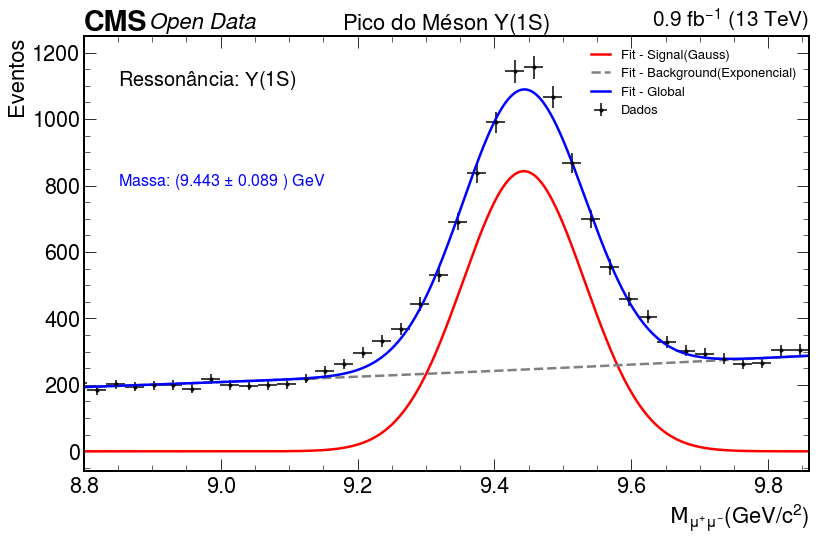

In [35]:
plt.figure(figsize = ( 13, 8 ))

counts_1, bin_edges_1 = np.histogram( lista_massa_fit , bins=np.linspace(xmin,xmax,n_bins) )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar(bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2,fmt='.', label = 'Dados', color = 'black')

plt.text(8.85,1100, r"Ressonância: $\Upsilon$(1S)", color = 'black', fontsize = 20)
plt.text(8.85,800, "Massa: ({:2.3f} $\pm$ {:2.3f} ) GeV".format(9.443 , 0.08901 ), color = 'blue', fontsize = 16)
#plt.text(8.85,700,"com: ({:2.3f} $\pm$ {:2.3f} ) MeV".format(1.700 ,1.900), color = 'blue', fontsize = 16)

# plot the pdfs
y_gauss = ( gauss.pdf(x) * frac ).numpy()  
y_exponential = ( exponential.pdf(x) * ( 1 - frac ) ).numpy()  
y_model = ( model.pdf(x) ).numpy()  

plt.plot(x, y_gauss*plot_scaling , '-', label="Fit - Signal(Gauss)", linewidth=linewidth, color = 'red')
plt.plot(x, y_exponential*plot_scaling , '--', label="Fit - Background(Exponencial)", linewidth=linewidth, color = 'gray')
plt.plot(x, y_model*plot_scaling , '-', label="Fit - Global", linewidth=linewidth, color = 'blue')

hep.cms.label( llabel="Open Data" , rlabel="0.9 fb$^{-1}$ (13 TeV)" , fontsize = 22 )

plt.xlabel(r"$\mathcal{M}_{\mu^{+}\mu^{-}}(GeV/c^{2})$", fontsize = 22 )
plt.ylabel( 'Eventos' , fontsize = 22 )
plt.title( r'Pico do Méson $\Upsilon$(1S)' , fontsize = 22 )
plt.legend(loc='best',fontsize = 13 )
plt.style.use(hep.style.ROOT)
plt.xlim(8.8,xmax)

# Segundo fit

* Fit para o Signal --> Crystall Ball
$$
CB = 
\exp\left ( -\dfrac{(x-\mu)^{2}}{2\sigma^{2}} \right ),\;\;\texttt{para}\; \dfrac{x-\mu}{\sigma} \geq - \alpha 
$$
$$
CB = A \cdot \left(B - \dfrac{x - \mu}{\sigma}\right),\;\; \texttt{para}\; \dfrac{x - \mu}{\sigma} < -\alpha
$$

$$
A = \left(\dfrac{n}{|\alpha|} \right)^{n} \cdot \exp \left( - \dfrac{|\alpha|^{2}}{2} \right)
$$

$$
B = \dfrac{n}{|\alpha|} - |\alpha|
$$
* Fit para o Background --> Polinômio de Hermite
$$
\mathcal{H}_{n+1}(x) = 2x\mathcal{H}_{n}(x) - 2n\mathcal{H}_{n-1}(x)
$$

In [36]:
obs2 = zfit.Space("x", limits=(xmin, xmax) )
massa2 = zfit.Parameter("massa2", 9.5, 9.1 , 9.7)
sigma2 = zfit.Parameter("sigma2", 0.2, 0.01 , 1)
alpha = zfit.Parameter("alpha", 3, 1 , 20)
n = zfit.Parameter("n", 0.2, 0.01 , 1)
grau = zfit.Parameter("grau", 0.2, -1 , 1)

In [37]:
frac2 = zfit.Parameter("fraction2", 0.2, -3 , 10)

In [38]:
crystall_ball = zfit.pdf.CrystalBall(mu=massa2, sigma=sigma2, alpha=alpha, n=n, obs=obs2, name='CrystalBall')
hermite = zfit.pdf.Hermite(obs = obs2, coeffs = grau)
modelo = zfit.pdf.SumPDF([crystall_ball, hermite], fracs = frac2)

In [39]:
nll_crystall_ball = zfit.loss.UnbinnedNLL(model=crystall_ball, data=data)
nll_hermite = zfit.loss.UnbinnedNLL(model=hermite, data=data)
nll_modelo = zfit.loss.UnbinnedNLL(model=modelo, data=data)

In [40]:
result_crystall_ball = minimizer.minimize(nll_crystall_ball)
param_errors_crystall_ball = result_crystall_ball.errors()

------------------------------------------------------------------
| FCN = 2265                    |     Ncalls=339 (339 total)     |
| EDM = 4.52e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


/home/matheus/miniconda3/lib/python3.8/site-packages/zfit/minimizers/fitresult.py:358: FutureWarning: 'minuit_minos' will be changed as the default errors method to a custom implementationwith the same functionality. If you want to make sure that 'minuit_minos' will be used in the future, add it explicitly as in `errors(method='minuit_minos')`
  warnings.warn("'minuit_minos' will be changed as the default errors method to a custom implementation"


In [41]:
result_crystall_ball

FitResult of
<UnbinnedNLL model=[<zfit.CrystalBall  params=[alpha, massa2, n, sigma2] dtype=float64>0] data=[<zfit.core.data.Data object at 0x7fd5181e8370>] constraints=[]> 
with
<Minuit strategy=PushbackStrategy tolerance=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm     │ min value   │
╞═════════╪═════════════╪══════════════════╪═════════╪═════════════╡
│ True    │ True        │ False            │ 4.5e-05 │ 2265        │
╘═════════╧═════════════╧══════════════════╧═════════╧═════════════╛

Parameters
name      value         minuit_minos    at limit
------  -------  -------------------  ----------
alpha     1.579  -  0.041   +  0.037       False
massa2    9.468  -  0.002   + 0.0021       False
n       0.05462  -  0.019   +  0.024       False
sigma2   0.1942  - 0.0021   + 0.0021       False

In [42]:
param_errors_crystall_ball

(OrderedDict([(<zfit.Parameter 'alpha' floating=True value=1.579>,
               ------------------------------------
|          |         alpha         |
------------------------------------
|  Error   |   -0.04   |   0.04    |
|  Valid   |   True    |   True    |
| At Limit |   False   |   False   |
| Max FCN  |   False   |   False   |
| New Min  |   False   |   False   |
------------------------------------),
              (<zfit.Parameter 'massa2' floating=True value=9.468>,
               ------------------------------------
|          |        massa2         |
------------------------------------
|  Error   |  -0.0020  |  0.0021   |
|  Valid   |   True    |   True    |
| At Limit |   False   |   False   |
| Max FCN  |   False   |   False   |
| New Min  |   False   |   False   |
------------------------------------),
              (<zfit.Parameter 'n' floating=True value=0.05462>,
               ------------------------------------
|          |           n           |
-----------

In [43]:
result_hermite = minimizer.minimize(nll_hermite)
param_errors_hermite = result_hermite.errors()

/home/matheus/miniconda3/lib/python3.8/site-packages/zfit/models/polynomials.py:27: UserWarning: The function <function Space.limit1d at 0x7fd51b8243a0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=(0,), limits=(array([[8.5]]), array([[9.86]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  lim_low, lim_high = limits.limit1d


------------------------------------------------------------------
| FCN = 4306                    |      Ncalls=18 (18 total)      |
| EDM = 1.84e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


In [44]:
result_hermite

FitResult of
<UnbinnedNLL model=[<zfit.Hermite  params=[FIXED_autoparam_1, grau] dtype=float64>0] data=[<zfit.core.data.Data object at 0x7fd5181e8370>] constraints=[]> 
with
<Minuit strategy=PushbackStrategy tolerance=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm     │ min value   │
╞═════════╪═════════════╪══════════════════╪═════════╪═════════════╡
│ True    │ True        │ False            │ 1.8e-06 │ 4306        │
╘═════════╧═════════════╧══════════════════╧═════════╧═════════════╛

Parameters
name      value         minuit_minos    at limit
------  -------  -------------------  ----------
grau     0.3252  - 0.0054   + 0.0054       False

In [45]:
param_errors_hermite

(OrderedDict([(<zfit.Parameter 'grau' floating=True value=0.3252>,
               ------------------------------------
|          |         grau          |
------------------------------------
|  Error   |  -0.005   |   0.005   |
|  Valid   |   True    |   True    |
| At Limit |   False   |   False   |
| Max FCN  |   False   |   False   |
| New Min  |   False   |   False   |
------------------------------------)]),
 None)

In [46]:
result_modelo = minimizer.minimize(nll_modelo)
param_errors_modelo = result_modelo.errors()

------------------------------------------------------------------
| FCN = 1714                    |     Ncalls=307 (307 total)     |
| EDM = 0.000657 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


In [47]:
result_modelo

FitResult of
<UnbinnedNLL model=[<zfit.SumPDF  params=[Composed_autoparam_2, fraction2] dtype=float64>0] data=[<zfit.core.data.Data object at 0x7fd5181e8370>] constraints=[]> 
with
<Minuit strategy=PushbackStrategy tolerance=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm     │ min value   │
╞═════════╪═════════════╪══════════════════╪═════════╪═════════════╡
│ True    │ True        │ False            │ 0.00066 │ 1714        │
╘═════════╧═════════════╧══════════════════╧═════════╧═════════════╛

Parameters
name         value         minuit_minos    at limit
---------  -------  -------------------  ----------
fraction2   0.3783  - 0.0068   + 0.0068       False
alpha        4.563  -    1.4   +    4.7       False
massa2       9.444  - 0.0016   + 0.0016       False
n           0.9976  -    0.5   +    0.5       False
sigma2     0.08866  - 0.0017   + 0.0018       False
grau        0.1268  - 0.0095   + 0.0093       

In [48]:
param_errors_modelo

(OrderedDict([(<zfit.Parameter 'fraction2' floating=True value=0.3783>,
               ------------------------------------
|          |       fraction2       |
------------------------------------
|  Error   |  -0.007   |   0.007   |
|  Valid   |   True    |   False   |
| At Limit |   False   |   False   |
| Max FCN  |   False   |   False   |
| New Min  |   False   |   False   |
------------------------------------),
              (<zfit.Parameter 'alpha' floating=True value=4.563>,
               ------------------------------------
|          |         alpha         |
------------------------------------
|  Error   |   -1.4    |    4.7    |
|  Valid   |   True    |   False   |
| At Limit |   False   |   False   |
| Max FCN  |   False   |   False   |
| New Min  |   False   |   True    |
------------------------------------),
              (<zfit.Parameter 'massa2' floating=True value=9.444>,
               ------------------------------------
|          |        massa2         |
----

In [49]:
massa2.set_value(9.444)
sigma.set_value(0.08866)
grau.set_value(0.1268)
n.set_value(0.9976)
frac2.set_value(0.3783)

(8.8, 9.86)

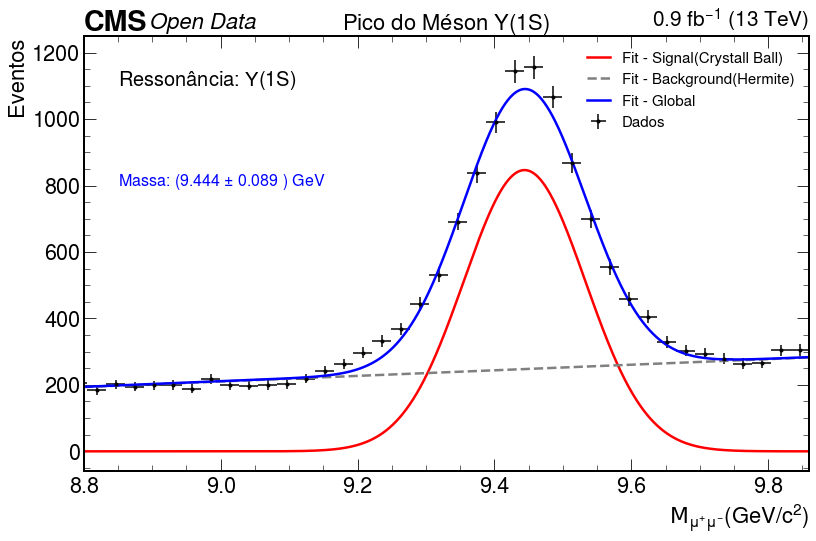

In [50]:
plt.figure(figsize = ( 13, 8 ))

counts_1, bin_edges_1 = np.histogram( lista_massa_fit , bins=np.linspace(xmin,xmax,n_bins) )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar(bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2,fmt='.', label = 'Dados', color = 'black')

plt.text(8.85,1100, r"Ressonância: $\Upsilon$(1S)", color = 'black', fontsize = 20)
plt.text(8.85,800, "Massa: ({:2.3f} $\pm$ {:2.3f} ) GeV".format(9.444 , 0.08866 ), color = 'blue', fontsize = 16)
#plt.text(8.85,700,"com: ({:2.3f} $\pm$ {:2.3f} ) MeV".format(1.600 ,1.700), color = 'blue', fontsize = 16)

# plot the pdfs
y_crystall_ball = ( crystall_ball.pdf(x) * frac ).numpy()  
y_hermite = ( hermite.pdf(x) * ( 1 - frac ) ).numpy()  
y_modelo = ( modelo.pdf(x) ).numpy()  

plt.plot(x, y_crystall_ball*plot_scaling , '-', label="Fit - Signal(Crystall Ball)", linewidth=linewidth, color = 'red')
plt.plot(x, y_hermite*plot_scaling , '--', label="Fit - Background(Hermite)", linewidth=linewidth, color = 'gray')
plt.plot(x, y_modelo*plot_scaling , '-', label="Fit - Global", linewidth=linewidth, color = 'blue')

hep.cms.label( llabel="Open Data" , rlabel="0.9 fb$^{-1}$ (13 TeV)" , fontsize = 22 )

plt.xlabel(r"$\mathcal{M}_{\mu^{+}\mu^{-}}(GeV/c^{2})$", fontsize = 22 )
plt.ylabel( 'Eventos' , fontsize = 22 )
plt.title( r'Pico do Méson $\Upsilon$(1S)' , fontsize = 22 )
plt.legend(loc='best',fontsize = 15 )
plt.style.use(hep.style.ROOT)
plt.xlim(8.8,xmax)

# Plots de Eficiência

## Efeitos no momentum e pseudorapidez

Criei uma função que calcula o rendimento a partir do erro relativo na reconstrução da massa em função das duas variáveis mencionadas para diferentes regiões das mesmas.

Usei o valor da massa obitido no ultimo fit global 

$\sigma_{relativo} = \dfrac{|x - 9.444|}{9.444}$

In [51]:
def sigma_rela(x , massa_upsilon = 9.444):
    return np.array( abs( x - massa_upsilon )/massa_upsilon )

Aqui temos o resultado em formato de histograma em duas dimensôes

Text(1, 41.0, '$P_{T}^{\\;\\;\\;\\mu^{+}\\mu^{-}}$')

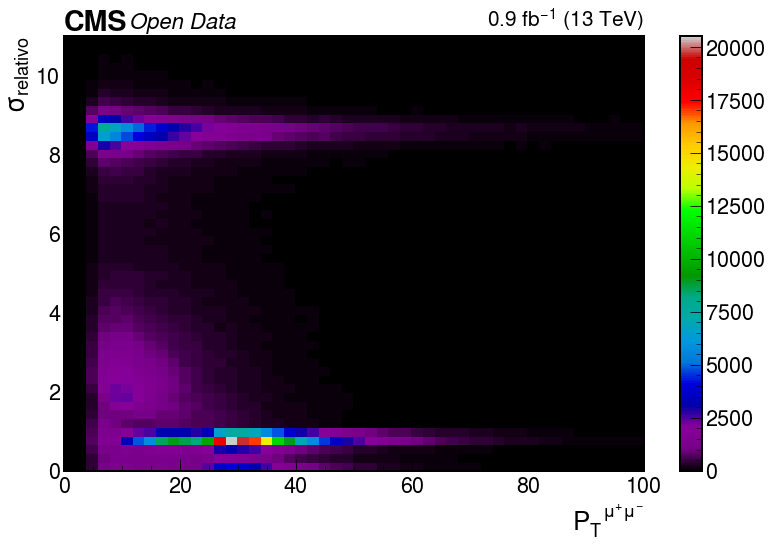

In [52]:
plt.figure(figsize = ( 13, 8 ))
plt.hist2d(lista_pt_after_cut, sigma_rela(lista_massa_pt) , bins=(50,50) ,  range =[ [0,100],[0,11] ], cmap = plt.cm.nipy_spectral )
plt.xlim(0,100)
plt.ylim(0,11)
plt.colorbar() 
plt.style.use(hep.style.ROOT)
hep.cms.label( llabel="Open Data" , rlabel="0.9 fb$^{-1}$ (13 TeV)" , fontsize = 22 )
plt.ylabel('$\sigma_{relativo}$')
plt.xlabel(r'$P_{T}^{\;\;\;\mu^{+}\mu^{-}}$')

Text(1, 41.0, '$\\eta^{\\;\\mu^{+}\\mu^{-}}$')

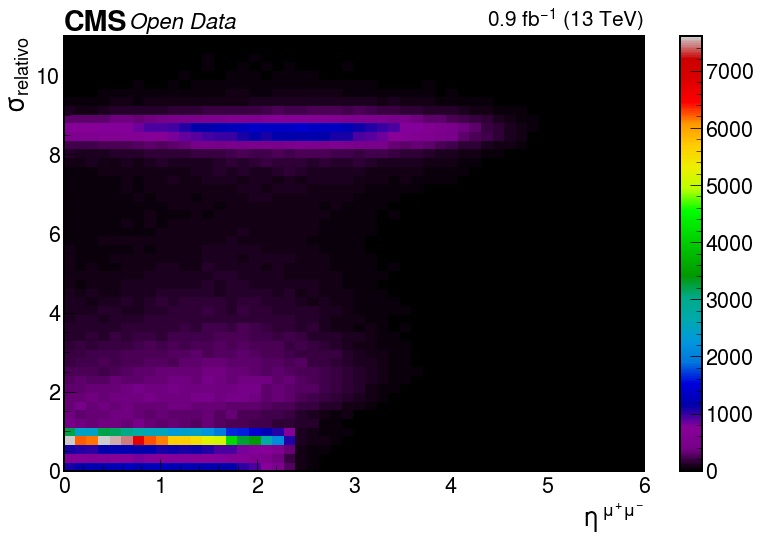

In [53]:
plt.figure(figsize = ( 13, 8 ))
plt.hist2d(lista_eta_pt, sigma_rela(lista_massa_pt) , bins=(50,50) ,  range =[ [0,6],[0,11] ], cmap = plt.cm.nipy_spectral )
plt.xlim(0,6)
plt.ylim(0,11)
plt.colorbar()
plt.style.use(hep.style.ROOT)
hep.cms.label( llabel="Open Data" , rlabel="0.9 fb$^{-1}$ (13 TeV)" , fontsize = 22 )
plt.ylabel('$\sigma_{relativo}$')
plt.xlabel(r'$\eta^{\;\mu^{+}\mu^{-}}$')

Não encontramos nenhuma correlação com os resultados encontrados de $P_{T}$ e $\eta$ com o erro relativo em relação ao valor esperado da massa do $\Upsilon(1S)$